In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

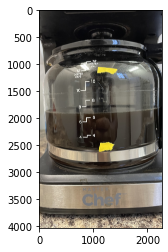

In [93]:
im323 = cv.cvtColor(cv.imread('./images/IMG_0323.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(im323)

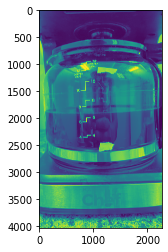

In [88]:
plt.imshow(gray)

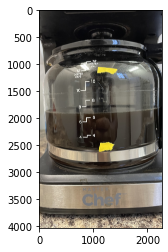

In [75]:
plt.imshow(im323)

In [131]:
lower_yellow = np.array([20, 50, 0])
upper_yellow = np.array([255, 255, 500])

In [132]:
mask_yellow = cv.inRange(
    cv.cvtColor(im323, cv.COLOR_RGB2HSV),
    lower_yellow,
    upper_yellow
)

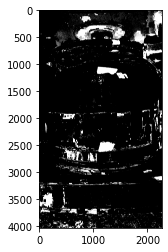

In [133]:
_, thr = cv.threshold(mask_yellow, 254, 255, cv.THRESH_BINARY)
plt.imshow(thr, cmap='gray')

True

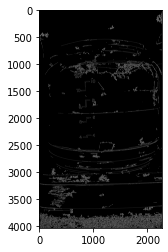

In [117]:
edges = cv.Canny(im323, 10, 200)
plt.imshow(edges, cmap='gray')
cv.imwrite('./images/im323_canny.jpg', edges)

In [120]:
import math

[[[1544 3905 1554 3905]]

 [[ 555 3889  572 3889]]

 [[ 700 4030  712 4030]]

 ...

 [[ 313 3325  332 3325]]

 [[ 415 3236  425 3236]]

 [[ 643 1205  643 1192]]]


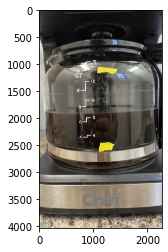

In [124]:
lines = cv.HoughLinesP(edges, 1, math.pi/2, 80, 30, 10);
im_cp = np.copy(im323)
print(lines)
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv.line(im_cp, pt1, pt2, (0,0,255), 3)
plt.imshow(im_cp)
# cv.imwrite("./images/hough_lines.jpg", im_cp)

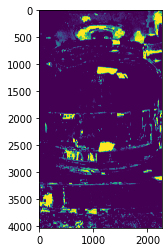

In [96]:
plt.imshow(mask_yellow)

In [125]:
edges = cv.Canny(im323, 100,200)

In [212]:
clean_yellow = cv.erode(thr, np.ones((30, 30)))

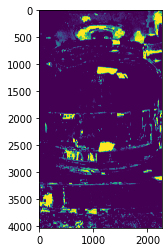

In [206]:
plt.imshow(thr)

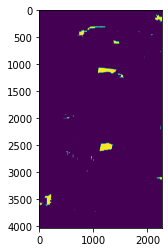

In [230]:
plt.imshow(clean_yellow)

In [231]:
contours, hierarchy = cv.findContours(clean_yellow, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [247]:
contours

[array([[[ 708, 3931]],
 
        [[ 713, 3931]]], dtype=int32),
 array([[[1039, 3727]],
 
        [[1038, 3728]],
 
        [[1023, 3728]],
 
        [[1048, 3728]],
 
        [[1049, 3729]],
 
        [[1049, 3733]],
 
        [[1049, 3727]]], dtype=int32),
 array([[[ 864, 3695]],
 
        [[ 871, 3695]]], dtype=int32),
 array([[[ 644, 3695]],
 
        [[ 654, 3695]],
 
        [[ 655, 3696]],
 
        [[ 655, 3697]],
 
        [[ 665, 3697]],
 
        [[ 665, 3695]]], dtype=int32),
 array([[[   0, 3519]],
 
        [[   0, 3603]],
 
        [[  30, 3603]],
 
        [[  31, 3604]],
 
        [[  31, 3615]],
 
        [[  32, 3616]],
 
        [[  33, 3616]],
 
        [[  33, 3602]],
 
        [[  34, 3601]],
 
        [[  49, 3601]],
 
        [[  49, 3570]],
 
        [[  50, 3569]],
 
        [[  81, 3569]],
 
        [[  81, 3567]],
 
        [[  18, 3567]],
 
        [[  17, 3566]],
 
        [[  17, 3563]],
 
        [[  16, 3563]],
 
        [[  15, 3562]],
 
        [[  

In [250]:
from operator import itemgetter

In [248]:
top_two = list(map(
    itemgetter(0),
    sorted(
        [(idx, cv.contourArea(c)) for (idx, c) in enumerate(contours)],
        key=itemgetter(1),
        reverse=True
    ),
    
))[:2]

In [249]:
top_two

[14, 23]

In [264]:
note_p1y, note_p1x = np.mean(contours[top_two[0]][:, :, 0]), np.mean(contours[top_two[0]][:, :, 1])
note_p2y, note_p2x = np.mean(contours[top_two[1]][:, :, 0]), np.mean(contours[top_two[1]][:, :, 1])
# for pt in contours[top_two[0]]:
#     print(pt[0, 0], pt[0, 1])
print((note_p1x, note_p1y), (note_p2x, note_p2y))

(2531.1526315789474, 1226.0947368421052) (1122.832558139535, 1273.9906976744187)


In [268]:
bottom_line, top_line = min(note_p1x, note_p2x), max(note_p2x, note_p1x)

In [269]:
top_line, bottom_line

(2531.1526315789474, 1122.832558139535)

In [271]:
np.linspace(bottom_line, top_line, 12, endpoint=True)

array([1122.83255814, 1250.86165572, 1378.89075331, 1506.9198509 ,
       1634.94894848, 1762.97804607, 1891.00714365, 2019.03624124,
       2147.06533882, 2275.09443641, 2403.12353399, 2531.15263158])

In [272]:
interesting = edges[round(bottom_line):round(top_line+1), :]

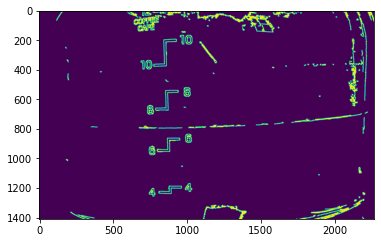

In [275]:
plt.imshow(cv.dilate(interesting, np.ones((5, 5))))

In [426]:
dy, dx = cv.Scharr(interesting, cv.CV_8U,1,0), cv.Scharr(interesting, cv.CV_8U, 0, 1)

In [427]:
_, dx_th = cv.threshold(dx, 254, 255, cv.THRESH_BINARY)
dx_th = dx_th.astype(dtype=np.uint8)
_, dy_th = cv.threshold(dy, 0, 1, cv.THRESH_BINARY)
dy_th = dy_th.astype(dtype=np.uint8)

print(dx_th.dtype)


blah = np.bitwise_and(dx_th, dy_th)

uint8


In [428]:
blah

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [429]:
coords = cv.findNonZero(blah)

In [434]:
np.percentile(coords[:, :, 1], 60)

778.0

In [440]:
good_coords = coords[np.abs(coords[:, :, 1] - np.percentile(coords[:, :, 1], 60)) < 5]

In [441]:
good_coords

array([[1180,  774],
       [1181,  774],
       [1182,  774],
       [1253,  774],
       [1254,  774],
       [1263,  774],
       [1264,  774],
       [1301,  774],
       [1302,  774],
       [1307,  774],
       [1308,  774],
       [1384,  774],
       [1385,  774],
       [1388,  774],
       [1389,  774],
       [1390,  774],
       [1254,  775],
       [1263,  775],
       [1264,  775],
       [1269,  775],
       [1283,  775],
       [1284,  775],
       [1301,  775],
       [1302,  775],
       [1335,  775],
       [1363,  775],
       [1376,  775],
       [1377,  775],
       [1384,  775],
       [1385,  775],
       [1388,  775],
       [1389,  775],
       [1247,  776],
       [1277,  776],
       [1283,  776],
       [1284,  776],
       [1332,  776],
       [1333,  776],
       [1335,  776],
       [1343,  776],
       [1358,  776],
       [1363,  776],
       [1376,  776],
       [1377,  776],
       [ 720,  777],
       [ 721,  777],
       [1195,  777],
       [1245,

In [401]:
# print(blah)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [364]:
# coords = cv.findNonZero(blah).astype(np.float64)

In [442]:
good_coords.shape

(152, 2)

In [453]:
coeff = np.polyfit(good_coords[:, 0].flatten(), good_coords[:, 1].flatten(), deg=0)

In [459]:
coeff[0]

778.0855263157894

In [465]:
coeff[0] / (top_line - bottom_line) * 100

55.24919661306408

In [455]:
x = np.linspace(1400, 2000, 1000)
y = [np.polyval(coeff, i) for i in x]

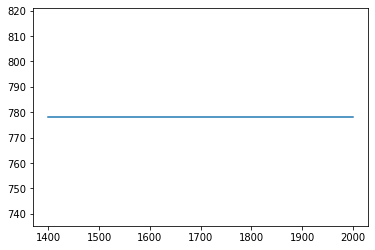

In [456]:
plt.plot(x, y)

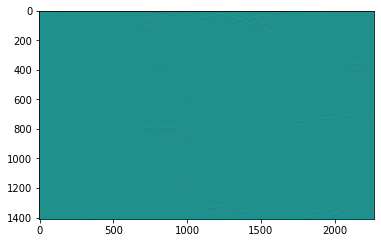

In [278]:
plt.imshow(dx)

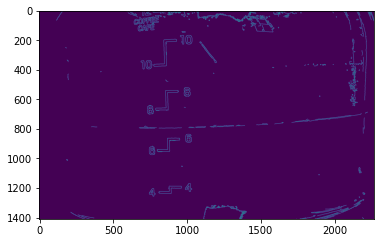

In [273]:
plt.imshow(interesting)

In [241]:
contours[best[0]]

array([[[1268, 2458]],

       [[1267, 2459]],

       [[1266, 2459]],

       [[1264, 2461]],

       [[1245, 2461]],

       [[1244, 2462]],

       [[1243, 2462]],

       [[1239, 2466]],

       [[1218, 2466]],

       [[1216, 2468]],

       [[1216, 2469]],

       [[1215, 2470]],

       [[1186, 2470]],

       [[1185, 2469]],

       [[1185, 2468]],

       [[1183, 2468]],

       [[1183, 2470]],

       [[1182, 2471]],

       [[1181, 2471]],

       [[1180, 2472]],

       [[1151, 2472]],

       [[1150, 2471]],

       [[1149, 2471]],

       [[1148, 2470]],

       [[1148, 2464]],

       [[1148, 2468]],

       [[1147, 2469]],

       [[1147, 2470]],

       [[1146, 2471]],

       [[1146, 2472]],

       [[1144, 2474]],

       [[1144, 2476]],

       [[1143, 2477]],

       [[1143, 2480]],

       [[1142, 2481]],

       [[1142, 2483]],

       [[1141, 2484]],

       [[1141, 2486]],

       [[1140, 2487]],

       [[1140, 2489]],

       [[1139, 2490]],

       [[1139, 2

In [ ]:
for pt in contours

In [221]:
params = cv.SimpleBlobDetector_Params()
params.minThreshold = 253
params.filterByColor = 1
params.blobColor = 255

# params.maxThreshold = 200

# params.filterByArea = True
# params.minArea = 50


In [222]:
detector = cv.SimpleBlobDetector_create(params)

In [223]:
kpts = detector.detect(clean_yellow)

In [224]:
for k in sorted(kpts, key=lambda x: x.response, reverse=True):
    print(k.pt, k.response)
#     break
# print(kpts)

In [225]:
im_with_keypoints = cv.drawKeypoints(clean_yellow, kpts, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

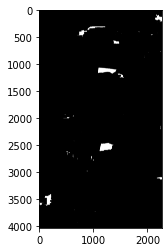

In [226]:
plt.imshow(im_with_keypoints)

In [158]:
cv.imwrite('./images/im323_blobs.jpg', cv.cvtColor(im_with_keypoints, cv.COLOR_RGB2BGR))

True